In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config IPCOmpleter.greedy=True

In [2]:
ruta_proyecto = 'C:/Users/mcana/OneDrive/Escritorio/PORTAFOLIO/ML/LEAD_SCORINGLEAD_SCORING_PROYECTO'

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

In [5]:
cat = pd.read_pickle(ruta_proyecto + '/Datos/tabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/Datos/tabajo/' + nombre_num)

In [7]:
cat.shape

(5320, 12)

In [8]:
num.shape

(5320, 6)

# EDA CATEGORICAS


##### Analisis estadistico

In [9]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize=True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor', 0:'Frecuencia'})\
                .sort_values(by=['Variable','Frecuencia'])
    return(resultado)

In [10]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
25,ambito,Healthcare Management,0.020301
28,ambito,International Business,0.020301
30,ambito,Media and Advertising,0.025940
35,ambito,Travel and Tourism,0.026880
22,ambito,"Banking, Investment And Insurance",0.044173
34,ambito,Supply Chain Management,0.045489
27,ambito,IT Projects Management,0.049248
23,ambito,Business Administration,0.052256
31,ambito,OTROS,0.066353
32,ambito,Operations Management,0.067481


In [21]:
#ELIMINAR REGISTROS
cat = cat.loc[(cat.no_llamar != 'OTROS') & (cat.no_enviar_email != 'YES') & (cat.ult_actividad != 'Email Bounced')] 


In [17]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 660737 to 579533
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   origen                 5320 non-null   object
 1   fuente                 5320 non-null   object
 2   no_enviar_email        5320 non-null   object
 3   no_llamar              5320 non-null   object
 4   ult_actividad          5320 non-null   object
 5   ambito                 5320 non-null   object
 6   ocupacion              5320 non-null   object
 7   conociste_google       5320 non-null   object
 8   conociste_periodico    5320 non-null   object
 9   conociste_facebook     5320 non-null   object
 10  conociste_referencias  5320 non-null   object
 11  descarga_lm            5320 non-null   object
dtypes: object(12)
memory usage: 540.3+ KB


In [22]:
cat = cat.drop(columns = ['conociste_facebook',
                     'conociste_google',
                     'conociste_periodico',
                     'conociste_referencias',
                     'no_enviar_email',
                     'no_llamar'])

In [23]:
cat.shape

(5114, 6)

In [24]:
num.shape

(5320, 6)

In [27]:
cat.index

Index([660737, 660728, 660719, 660681, 660680, 660673, 660664, 660624, 660616,
       660562,
       ...
       579753, 579735, 579728, 579712, 579701, 579697, 579642, 579615, 579538,
       579533],
      dtype='int64', name='id', length=5114)

In [29]:
num = num[num.index.isin(cat.index)]

In [30]:
cat.shape

(5114, 6)

In [31]:
num.shape

(5114, 6)

### Analisis Grafico

In [40]:
def graficos_eda_categoricos(cat):
    from math import ceil 
    filas = ceil(cat.shape[1] / 2 )
    f, ax = plt.subplots(nrows= filas, ncols=2, figsize= (16, filas * 6))
    ax = ax.flat
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax= ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize=7)

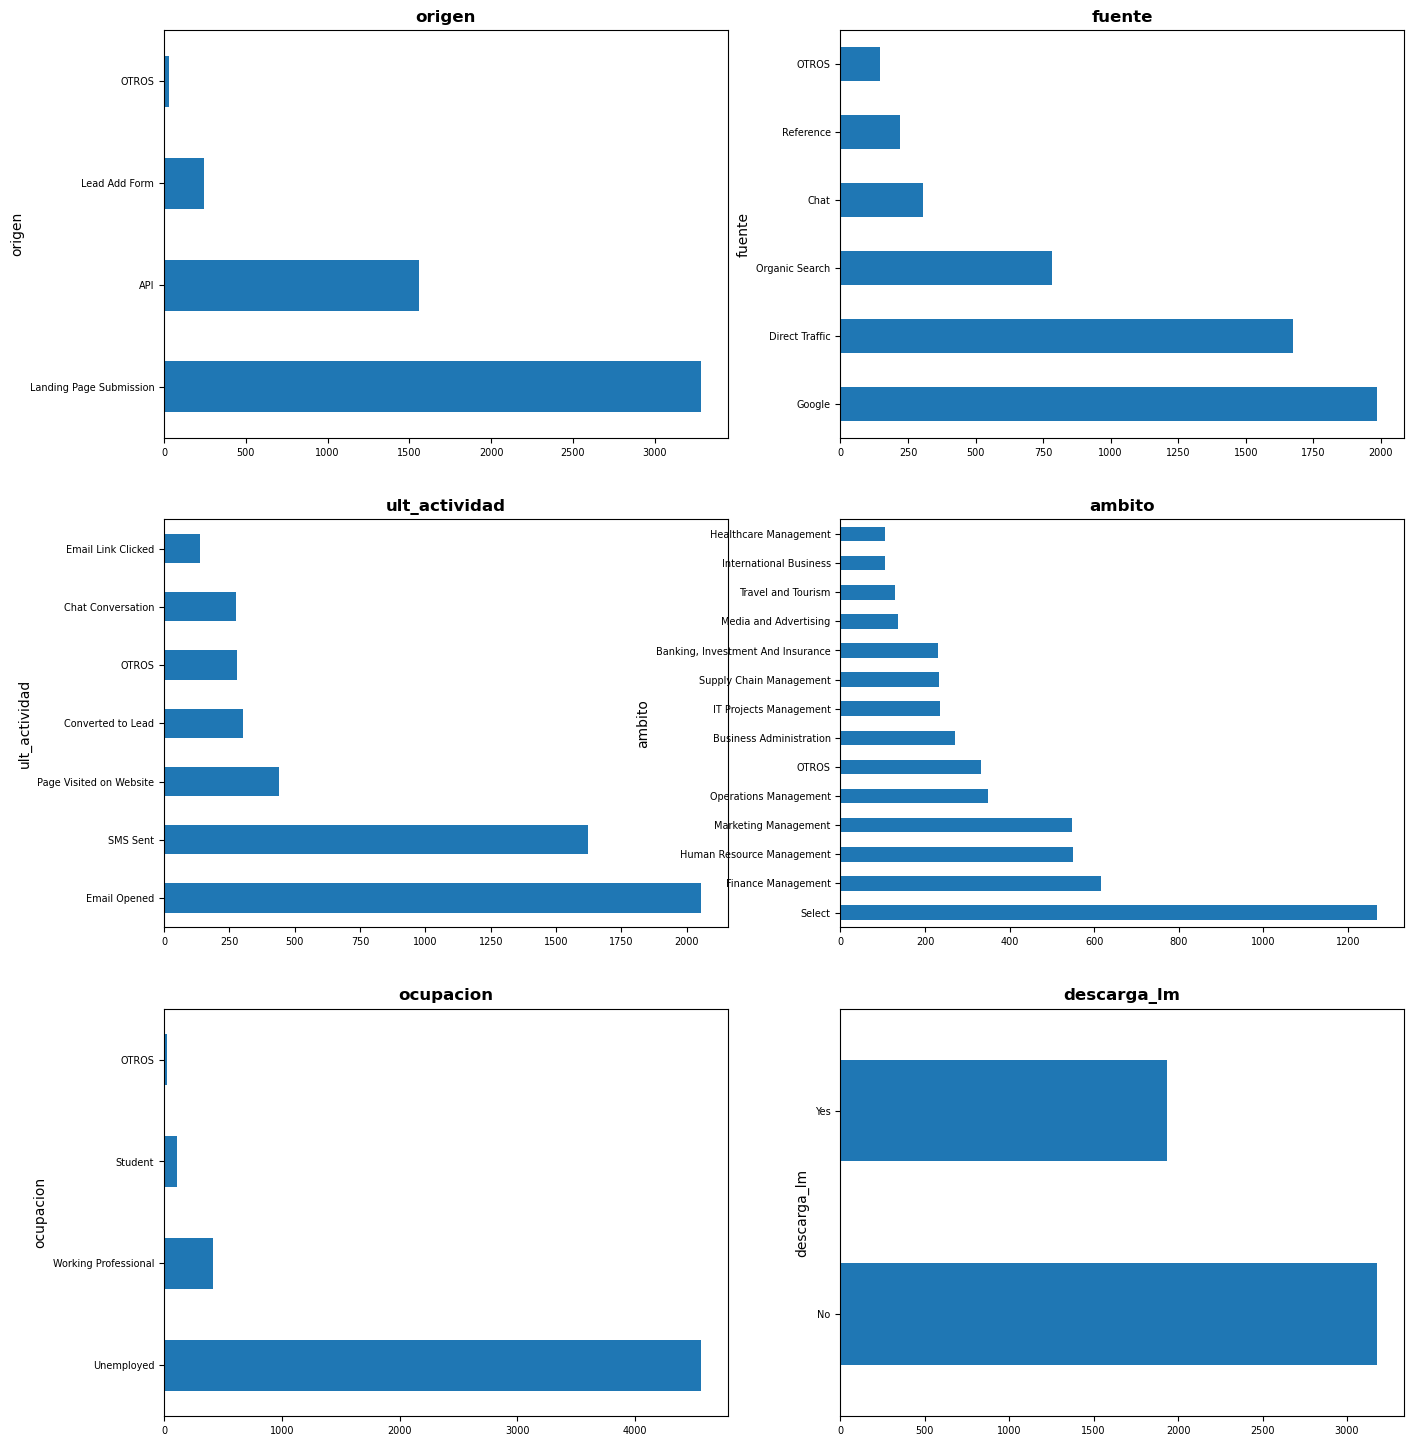

In [41]:
graficos_eda_categoricos(cat)

# EDA NUMERICAS 


In [46]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    estadisticos['median'] = num.median()
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(estadisticos)

In [47]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,5114.0,0.403207,0.0,0.49059,0.0,0.0,0.0,1.0,1.0
visitas_total,5114.0,4.207274,3.0,3.706161,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,5114.0,598.519163,362.0,553.478328,0.0,129.0,362.0,1087.0,2272.0
paginas_vistas_visita,5114.0,2.887515,2.5,1.953188,0.0,2.0,2.5,4.0,20.0
score_actividad,5114.0,14.045952,14.0,0.983554,7.0,14.0,14.0,14.0,18.0
score_perfil,5114.0,16.302894,16.0,1.427416,11.0,16.0,16.0,17.0,20.0


##### ANALISIS GRÁFICO 


In [48]:
def graficos_eda_continuas(num):
    
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat 
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

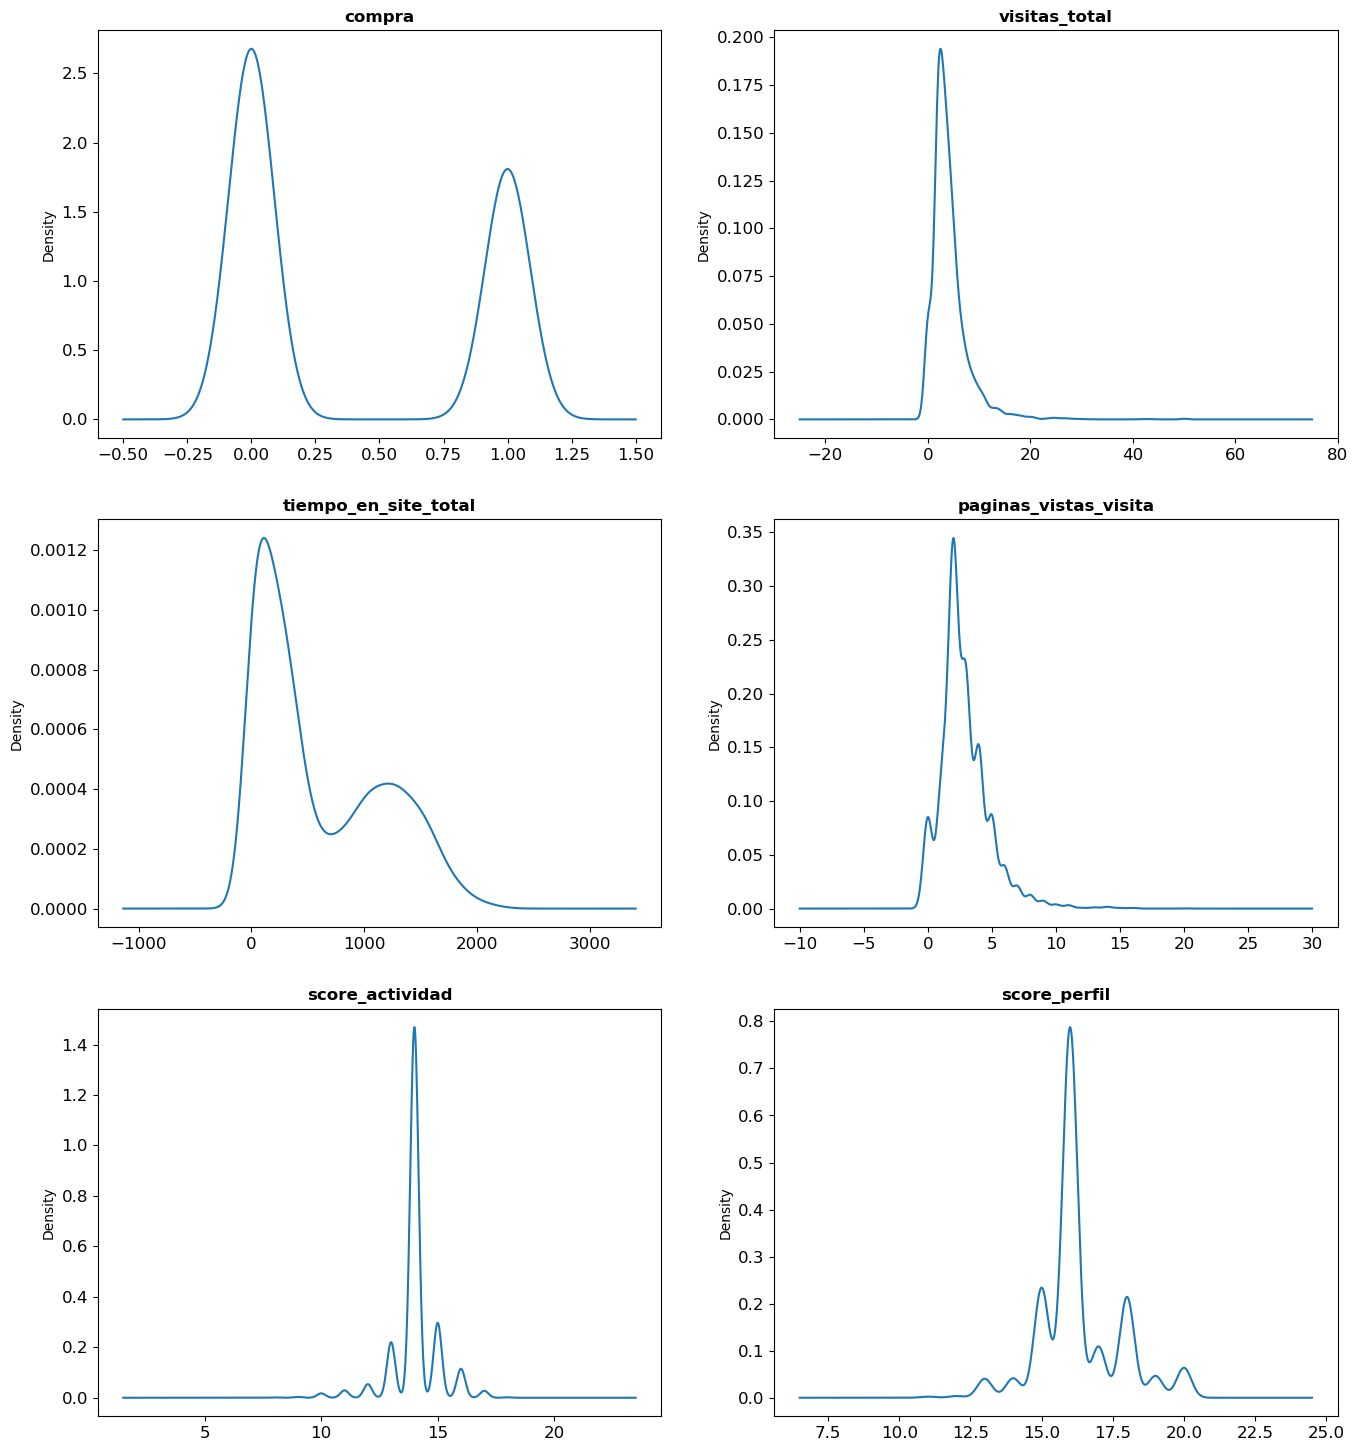

In [49]:
graficos_eda_continuas(num)

In [50]:
ruta_cat = ruta_proyecto + '/Datos/Tabajo/' + 'cat_resultado_calidad.pickle'
ruta_num = ruta_proyecto + '/Datos/Tabajo/' + 'num_resultado_calidad.pickle'

In [52]:
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)